In [218]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [219]:
data_df = pd.read_csv('Qualitative_Bankruptcy.data.txt')

In [220]:
data_df.head()

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


In [221]:
data_df.columns = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']
# setting column headers

In [222]:
data_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


In [223]:
data_df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,249,249,249,249,249,249,249
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,142


In [224]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
Industrial Risk          249 non-null object
Management Risk          249 non-null object
Financial Flexibility    249 non-null object
Credibility              249 non-null object
Competitiveness          249 non-null object
Operating Risk           249 non-null object
Class                    249 non-null object
dtypes: object(7)
memory usage: 6.9+ KB


We see that the data set has 6 attributes to predict bankruptcy. The 7th attribute is the Class statin whether we predict the enitity to be bankrupt or non-bankrupt.
The 6 attriutes are namely:
i.Industry risk (IR): 
    Government policies and International agreements, 
    Cyclicality, 
    Degree of competition,
    The price and stability of market supply,
    The size and growth of market demand,
    The sensitivity to changes in macroeconomic factors,
    Domestic and international competitive power, 
    Product Life Cycle.

ii.Management risk(MR): 
    Ability and competence of management, 
    Stability of management,
    The relationship between management/ owner, 
    Human resources management, 
    Growth process/business performance, 
    Short and long term business planning, 
    achievement and feasibility. 

iii.Financial Flexibility(FF): 
    Direct financing, 
    Indirect financing, 
    Other financing 

iv.Credibility (CR):
    Credit history,
    reliability of information, 
    The relationship with financial institutes.

v.Competitiveness (CO):
    Market position, 
    The level of core capacities, 
    Differentiated strategy, 

vi.Operating Risk (OP):
    The stability and diversity of procurement, 
    The stability of transaction, 
    The efficiency of production, 
    The prospects for demand for product and service, 
    Sales diversification,
    Sales price and settlement condition, 
    Collection of A/R,
    Effectiveness of sale network.

In [225]:
data_df.isna().sum()
# checking for null values

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

In [226]:
data_df.dtypes

Industrial Risk          object
Management Risk          object
Financial Flexibility    object
Credibility              object
Competitiveness          object
Operating Risk           object
Class                    object
dtype: object

We see that all of the atributes are being considered as object data type. To proceed with any of the ML algorithms, we need to convert these columns into categorical type. This means that we'll encode the nominal categorical values from each colun into a numerical one. To do this manually, we shall be using .replace()

In [227]:
replace_map = {"N":1,"A":2,"P":3,"NB":0,"B":1}
# defining the encoding dictionary

In [228]:
data_df.replace(replace_map,inplace=True)
# manually replacing or encoding the numericals defined in our mapping dictionary above

In [229]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
Industrial Risk          249 non-null int64
Management Risk          249 non-null int64
Financial Flexibility    249 non-null int64
Credibility              249 non-null int64
Competitiveness          249 non-null int64
Operating Risk           249 non-null int64
Class                    249 non-null int64
dtypes: int64(7)
memory usage: 13.7 KB


In [230]:
for col in ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']:
    data_df[col] = data_df[col].astype('category')
# typecasting all columns into categorical type

In [231]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
Industrial Risk          249 non-null category
Management Risk          249 non-null category
Financial Flexibility    249 non-null category
Credibility              249 non-null category
Competitiveness          249 non-null category
Operating Risk           249 non-null category
Class                    249 non-null category
dtypes: category(7)
memory usage: 2.4 KB


Since we are going to be performing unsupervised learning algorithms on this problem, we need to separate the dependent variable from the dependent ones.

In [232]:
data_X = data_df.iloc[:, :-1]
data_y = data_df.iloc[:,-1:]

In [233]:
data_X
# independent features

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,1,1,2,2,2,1
1,2,2,2,2,2,2
2,3,3,3,3,3,3
3,1,1,3,3,3,1
4,2,2,3,3,3,2
...,...,...,...,...,...,...
244,1,1,2,1,1,1
245,3,1,1,1,1,1
246,2,1,1,1,1,1
247,1,1,1,1,1,1


In [234]:
data_y
# dependent variable

,Class
0,0
1,0
2,0
3,0
4,0
...,...
244,1
245,1
246,1
247,1


0    142
1    107
Name: Class, dtype: int64

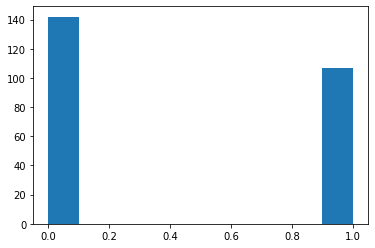

In [235]:
plt.hist(data_y['Class'])
data_y['Class'].value_counts()
# checking the distribution of target column

We see that 142 records belong to the Class 0 (Non-Bankrupt) and 107 records belong to the Class 1 (Bankrupt). There is a class imbalance in terms of equal representation of both the classes, but the difference is not much to highly bias the predictions.

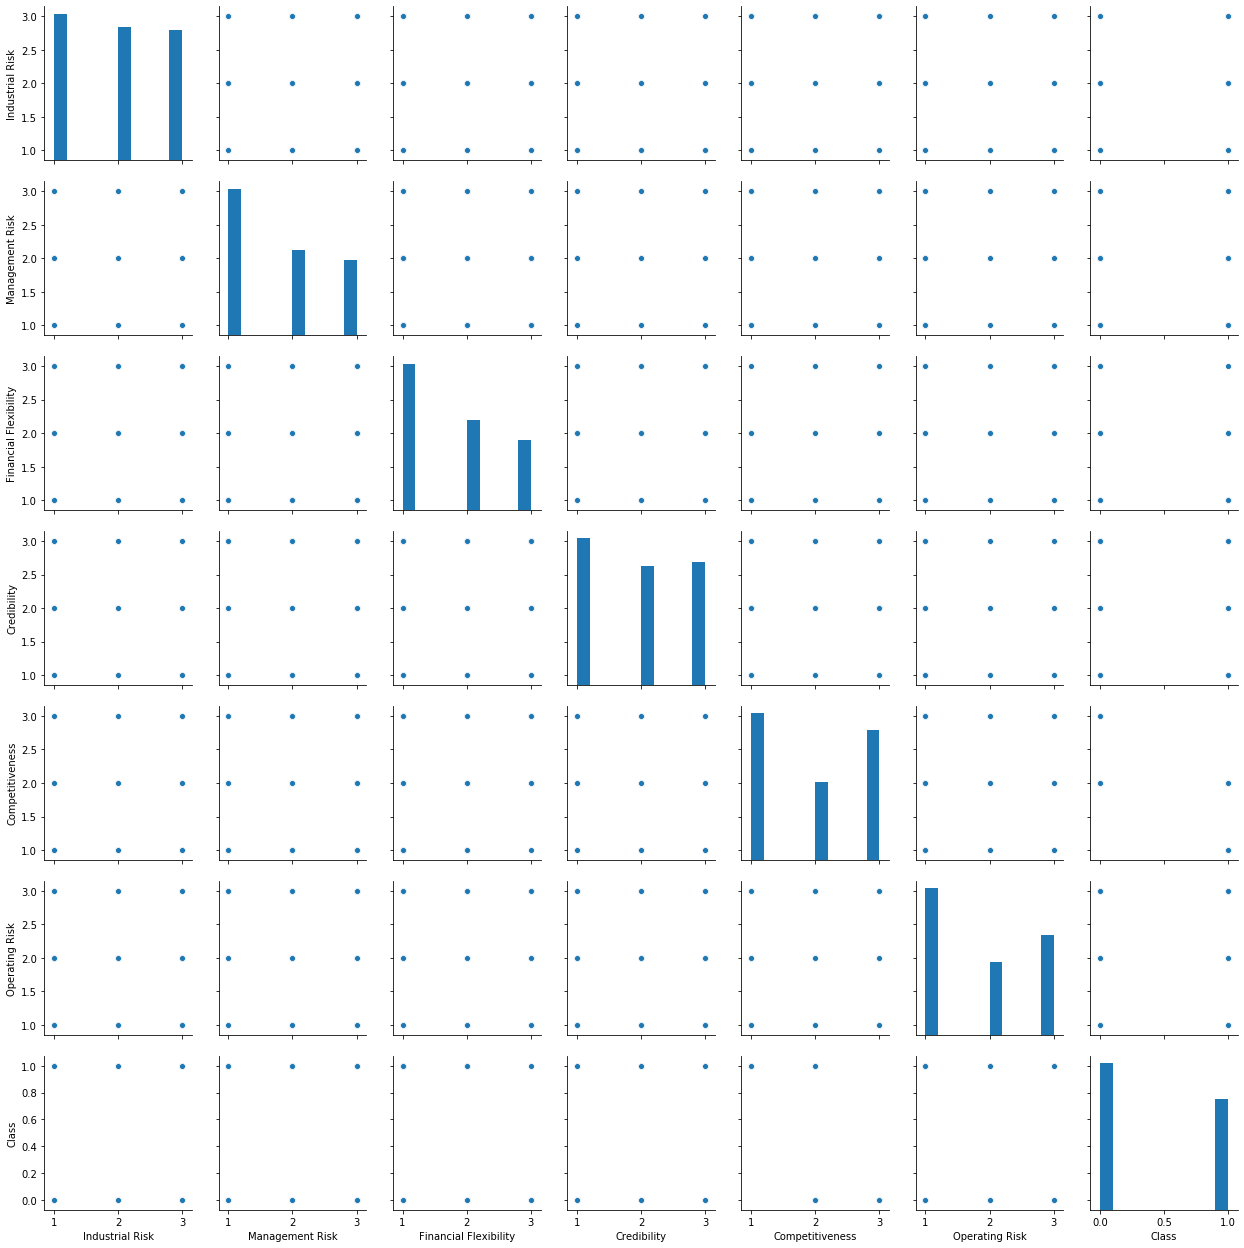

In [236]:
sns.pairplot(data_df)
# checking the distribution of independent features

Observations on independent features:
* 'Industrial Risk' has almost equal representation from all 3 columns values (negative, average and positive).
* 'Management RIsk', 'Financial Flexibility' & 'Credibility' have more records wih negative values than average or psitive.
* 'Competitiveness' & 'Operating Risk' have very few records with average value. Records with negative value are the majority in these features.

### K-Means Clustering

In [239]:
from sklearn.cluster import KMeans
# checking for optimal number of clusters

from sklearn import metrics

cluster_range = range(2, 20)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(data_X)
  labels = clusters.labels_                     # capturing the cluster lables
  centroids = clusters.cluster_centers_         # capturing the centroids
  cluster_errors.append(clusters.inertia_)    # capturing the intertia
  cluster_sil_scores.append(metrics.silhouette_score(data_X, labels))

# combining the cluster_range and cluster_errors into a dataframe
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )

([<matplotlib.axis.XTick at 0x1e822c50>,
 <a list of 18 Text xticklabel objects>)

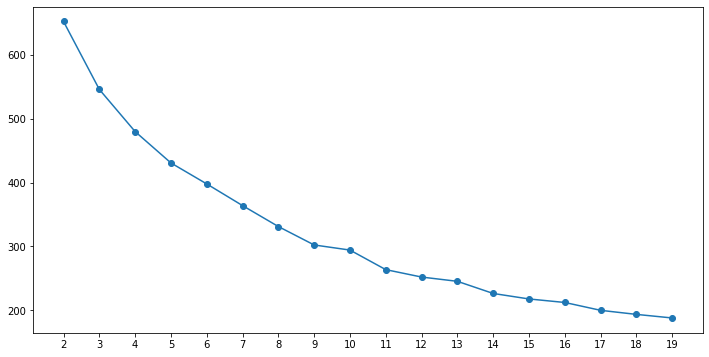

In [240]:
# checking for optimal number of clusters using elbow plot
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xticks(clusters_df.num_clusters)

Looking at the elbow plot, optimum number of clusters should be in the range 2-5. Let's have a look at the silhouette scores for better decision making on optimum number of clusters.

([<matplotlib.axis.XTick at 0x1e998e70>,
 <a list of 18 Text xticklabel objects>)

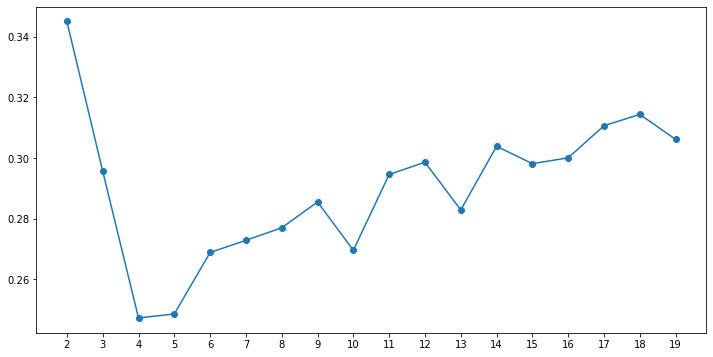

In [241]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df['Avg Sil Score'], marker = "o" )
plt.xticks(clusters_df.num_clusters)

###### It is clear from the above plot that we should choose 2 clusters as optimum, since it gives the highest silhouette score.

#### Applying the KMeans clustering model with n = 2.

In [242]:
cluster = KMeans(n_clusters = 2, random_state = 0, n_init=5)
cluster.fit(data_X)
# applying the KMeans model on data
data_X['Cluster_Class'] = cluster.labels_
# populating the cluster labels in a new column in the dataframe

In [243]:
data_X

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Cluster_Class
0,1,1,2,2,2,1,0
1,2,2,2,2,2,2,1
2,3,3,3,3,3,3,1
3,1,1,3,3,3,1,1
4,2,2,3,3,3,2,1
...,...,...,...,...,...,...,...
244,1,1,2,1,1,1,0
245,3,1,1,1,1,1,0
246,2,1,1,1,1,1,0
247,1,1,1,1,1,1,0


In [244]:
data_X['Cluster_Class'].value_counts()

1    141
0    108
Name: Cluster_Class, dtype: int64

### Support Vector Classifier

In [245]:
from sklearn import svm
# importing svm from sklearn library

In [246]:
from sklearn.model_selection import train_test_split
# for splitting the data into train and test sets
X = data_df.iloc[:, :-1]
# independent features
y = data_df.iloc[:,-1:]
# target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [247]:
clf = svm.SVC(gamma=0.025, C=3)
# defining the SVC model
clf.fit(X_train , y_train)
# applying the model on training data

C:\Users\TuryansuSubhadarshy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [248]:
y_pred = clf.predict(X_test)
# predicting the target variable using testing dataset

Let's have a look at the accuracy of this SVC model.

In [250]:
from sklearn import metrics
# importing metrics from sklearn library
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


For further evaluation, we can also check precision and recall of the model.

In [251]:
metrics.confusion_matrix(y_test,y_pred)

array([[47,  0],
       [ 0, 36]], dtype=int64)

In [252]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0


After looking at the metrics, we can see that the SVC model has 100% accurcy in the testing data set.
This means 10% accurate precison and recall as well.